[.] Type <c> to print or <p> to plot
[>] p


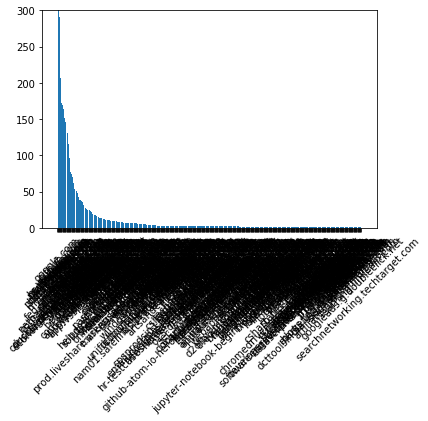

In [8]:
import os
import sqlite3
import operator
from collections import OrderedDict
import matplotlib.pyplot as plt

def parse(url):
	try:
		parsed_url_components = url.split('//')
		sublevel_split = parsed_url_components[1].split('/', 1)
		domain = sublevel_split[0].replace("www.", "")
		return domain
	except IndexError:
		print("URL format error!")

def analyze(results):

	prompt = input("[.] Type <c> to print or <p> to plot\n[>] ")

	if prompt == "c":
		for site, count in sites_count_sorted.items():
			print(site, count)
	elif prompt == "p":
		plt.bar(range(len(results)), results.values(), align='edge')
		plt.ylim([0,300])
		plt.xticks(rotation=45)
		plt.xticks(range(len(results)), results.keys())
		plt.show()
	else:
		print ("[.] Uh?")
		quit()

#path to user's history database (Chrome)
data_path = r'C:\Users\saket.vats\AppData\Local\Google\Chrome\User Data\Default'
files = os.listdir(data_path)

history_db = os.path.join(data_path, 'history')

#querying the db
c = sqlite3.connect(history_db)
cursor = c.cursor()
select_statement = "SELECT urls.url, urls.visit_count FROM urls, visits WHERE urls.id = visits.url;"
cursor.execute(select_statement)

results = cursor.fetchall() #tuple
#print(results)
sites_count = {} #dict makes iterations easier :D

for url, count in results:
	url = parse(url)
	if url in sites_count:
		sites_count[url] += 1
	else:
		sites_count[url] = 1

sites_count_sorted = OrderedDict(sorted(sites_count.items(), key=operator.itemgetter(1), reverse=True))

analyze (sites_count_sorted)